_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title"><b>Weather Condition Classification</b></div>

<div class="usecase-authors"><b>Authored by: </b>Aremu Akintomiwa James</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data analysis, Machine Learning, Basic Meteorology</div>
</div>

<div class="usecase-section-header"><b>Scenario</b></div>

 As an urban planner or agricultural manager, I need to accurately classify different weather conditions using environmental features to determine the optimal times for infrastructure projects and agricultural activities. This will ensure that operations are conducted under favorable weather conditions, thereby providing actionable insights for planning and decision-making.



<div class="usecase-section-header"><b>What this use case will teach you</b></div>

At the end of this use case you will:
- Understand how to preprocess and analyze environmental data.
- Learn how to build and evaluate a machine learning model for classification tasks.
- Gain experience in feature selection and engineering for weather-related datasets.
- Develop skills in using Python libraries such as Pandas, Scikit-learn, and Matplotlib.
- Understand the importance of accurate weather classification for planning and decision-making in various sectors.


<div class="usecase-section-header"><b> introduction</b></div>

In this use case, we aim to develop a robust machine learning model capable of accurately classifying various weather conditions such as sunny, cloudy, rainy, and stormy using environmental features. These features include ambient air temperature, relative humidity, atmospheric pressure, wind speed and direction, and gust wind speed. Accurate weather classification is important for optimizing the timing of infrastructure projects and agricultural activities, ensuring that operations are conducted under favorable weather conditions. By leveraging machine learning techniques, we can provide actionable insights for planning and decision-making.



<div class="usecase-section-header"><b>Background</b></div>

Weather conditions have a significant impact on various sectors, including agriculture, construction, and transportation. Accurate weather forecasts and classifications can help in planning and executing operations more efficiently. For instance, farmers can optimize planting and harvesting times based on expected weather conditions, while construction projects can be scheduled to avoid adverse weather that could delay progress or compromise safety.

In this project, we will use historical weather data from Melbourne's open data portal. The datasets include:
- Microclimate sensors data — CoM Open Data Portal (melbourne.vic.gov.au)
- Argyle Square Weather Stations (Historical Data) — CoM Open Data Portal (melbourne.vic.gov.au)

- Argyle Square Air Quality — CoM Open Data Portal (melbourne.vic.gov.au)


<div class="usecase-section-header"><b>Dataset Information</b></div>

The dataset for this project includes the following features::
- Ambient air temperature (°C)
- Relative humidity (%)
- Atmospheric pressure (hPa)
- Wind speed (m/s)
- Wind direction (degrees)
- Gust wind speed (m/s)


These features will be used to classify weather conditions into categories such as sunny, cloudy, rainy, and stormy. The dataset will be preprocessed to handle any missing values, outliers, or inconsistencies before being used to train the machine learning model.

In [2]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# **Preferred Method**: Export Endpoint
import requests
from io import StringIO


def API_unlimited(datasetName):

    dataset_id = datasetName
    # https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
    #dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
    
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'
    
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
       # 'api_key': apikey
    }
    
    # GET request
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetName = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetName.sample(10, random_state=999)) # Test
        return datasetName
    else:
        print(f'Request failed with status code {response.status_code}')

In [4]:
dataset_id_1 = 'microclimate-sensors-data'
dataset_id_2 = 'meshed-sensor-type-1'
dataset_id_3 = 'argyle-square-air-quality'

dataset1 = API_unlimited(dataset_id_1)

                device_id                received_at  \
13554  ICTMicroclimate-08  2024-06-09T15:09:09+00:00   
32471  ICTMicroclimate-01  2024-06-15T17:11:57+00:00   
33716  ICTMicroclimate-06  2024-07-21T15:02:32+00:00   
42410  ICTMicroclimate-07  2024-07-20T00:14:06+00:00   
38026  ICTMicroclimate-07  2024-07-30T23:34:09+00:00   
45723           aws5-0999  2024-07-26T01:00:51+00:00   
16933  ICTMicroclimate-08  2024-07-02T11:37:11+00:00   
4457   ICTMicroclimate-02  2024-06-08T05:06:52+00:00   
26130  ICTMicroclimate-09  2024-07-26T07:01:08+00:00   
32272  ICTMicroclimate-07  2024-06-16T20:13:13+00:00   

                                          sensorlocation  \
13554  Swanston St - Tram Stop 13 adjacent Federation...   
32471                    Birrarung Marr Park - Pole 1131   
33716  Tram Stop 7B - Melbourne Tennis Centre Precinc...   
42410  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
38026  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
45723                  

In [5]:
dataset2 = API_unlimited(dataset_id_2)

              dev_id                       time         rtc  battery  \
45371   atmos41-32fc  2021-01-31T08:42:43+00:00   1156751.0    4.181   
44274   atmos41-32fc  2021-04-11T02:55:16+00:00   7183889.0    4.208   
113852  atmos41-32fc  2024-05-21T02:42:55+00:00  82249629.0    4.209   
46459   atmos41-32fc  2021-03-17T09:54:10+00:00   5049028.0    4.193   
82554   atmos41-32fc  2023-06-13T08:20:13+00:00  52634772.0    4.187   
69859   atmos41-32fc  2023-01-16T15:45:43+00:00  39874344.0    4.159   
64444   atmos41-32fc  2022-11-30T07:48:19+00:00  35784909.0    4.189   
9933    atmos41-32fc  2021-10-22T02:25:52+00:00    860109.0    4.209   
61734   atmos41-32fc  2022-11-09T10:34:37+00:00  33980494.0    4.177   
31084   atmos41-32fc  2021-07-20T04:16:27+00:00  15828706.0    4.203   

        solarpanel  command  solar  precipitation  strikes  windspeed  \
45371       22.080      0.0  169.0            0.0      0.0       2.01   
44274       22.499      0.0  700.0            0.0      0.0   

In [6]:
dataset3 = API_unlimited(dataset_id_3)

                             time    dev_id           sensor_name  \
33731   2020-06-11T16:21:52+00:00  ems-ce10  Air Quality Sensor 1   
58139   2021-07-10T10:57:51+00:00  ems-ce10  Air Quality Sensor 1   
107044  2022-06-09T20:34:51+00:00  ems-ec8a  Air Quality Sensor 2   
86091   2020-11-29T11:46:53+00:00  ems-ec8a  Air Quality Sensor 2   
142270  2024-06-23T01:38:09+00:00  ems-ec8a  Air Quality Sensor 2   
1659    2021-05-20T03:25:01+00:00  ems-ce10  Air Quality Sensor 1   
137971  2024-04-05T18:50:31+00:00  ems-ec8a  Air Quality Sensor 2   
2464    2020-07-12T19:39:43+00:00  ems-ec8a  Air Quality Sensor 2   
124252  2023-02-10T03:12:05+00:00  ems-ec8a  Air Quality Sensor 2   
117136  2022-11-03T14:55:29+00:00  ems-ec8a  Air Quality Sensor 2   

                       lat_long  averagespl  carbonmonoxide  humidity  ibatt  \
33731   -37.802772, 144.9655513        55.0         -2037.0      89.0  163.0   
58139   -37.802772, 144.9655513        62.0         -3058.0     100.0  138.0   


In [7]:
dataset1.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


In [8]:
dataset1.shape

(49681, 16)

In [9]:
dataset1.columns

Index(['device_id', 'received_at', 'sensorlocation', 'latlong',
       'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection',
       'minimumwindspeed', 'averagewindspeed', 'gustwindspeed',
       'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25',
       'pm10', 'noise'],
      dtype='object')

In [10]:
dataset2.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,windspeed,winddirection,gustspeed,vapourpressure,atmosphericpressure,relativehumidity,airtemp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


In [11]:
dataset2.shape

(119654, 18)

In [12]:
dataset2.columns

Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'windspeed', 'winddirection', 'gustspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp',
       'lat_long', 'sensor_name'],
      dtype='object')

In [13]:
dataset3.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [14]:
dataset3.shape

(142507, 19)

In [15]:
dataset3.columns

Index(['time', 'dev_id', 'sensor_name', 'lat_long', 'averagespl',
       'carbonmonoxide', 'humidity', 'ibatt', 'nitrogendioxide', 'ozone',
       'particulateserr', 'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25',
       'temperature', 'vbatt', 'vpanel'],
      dtype='object')

#### standardizing column names for dataset1

In [16]:
dataset1 = dataset1.rename(columns={'received_at':'time', 'latlong':'lat_long', 'minimumwinddirection':'min_wind_direction', 'averagewinddirection':'avg_wind_direction', 'maximumwinddirection':'max_wind_direction', 
                        'minimumwindspeed':'min_wind_speed', 'averagewindspeed':'avg_wind_speed', 'gustwindspeed':'gust_wind_speed',
          'airtemperature':'air_temp', 'relativehumidity':'humidity', 'atmosphericpressure':'atm_pressure'})
dataset1.head()

,device_id,time,sensorlocation,lat_long,min_wind_direction,avg_wind_direction,max_wind_direction,min_wind_speed,avg_wind_speed,gust_wind_speed,air_temp,humidity,atm_pressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


#### atandersizing column names for datasets2

In [17]:
dataset2 =dataset2.rename(columns={'windspeed':'avg_wind_speed', 'winddirection':'avg_wind_direction', 'gustspeed':'gust_wind_speed',
           'atmosphericpressure':'atm_pressure', 'relativehumidity':'humidity', 'airtemp':'air_temp'})
dataset2.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,vapourpressure,atm_pressure,humidity,air_temp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


#### standersizing column names for datasets3

In [18]:
dataset3.rename(columns={'temperature':'air_temp',})
dataset3.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [19]:
dataset3.shape

(142507, 19)

#### merging the datasets together

In [20]:
# Convert time column in df1 to datetime with UTC timezone
#dataset2['time'] = pd.to_datetime(dataset2['time'], utc=True)

In [21]:
combine_df = pd.concat([dataset2, dataset3], axis=1,join='inner')
combine_df.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [22]:
combine_df.isna().sum()*100/len(combine_df)

dev_id                0.000000
time                  0.000000
rtc                   2.237284
battery               1.745032
solarpanel            1.835292
command               1.779297
solar                 2.325873
precipitation         2.326709
strikes               2.326709
avg_wind_speed        1.837799
avg_wind_direction    1.838635
gust_wind_speed       1.838635
vapourpressure        2.326709
atm_pressure          1.838635
humidity              1.838635
air_temp              2.325873
lat_long              2.237284
sensor_name           2.237284
time                  0.000000
dev_id                0.000000
sensor_name           0.000000
lat_long              0.000000
averagespl            7.372090
carbonmonoxide        7.372090
humidity              7.372090
ibatt                 7.372090
nitrogendioxide       7.372090
ozone                 7.372090
particulateserr       7.372090
particulatesvsn       7.372090
peakspl               7.372090
pm1                   7.372090
pm10    

In [23]:
combine_df.columns


Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'avg_wind_speed', 'avg_wind_direction',
       'gust_wind_speed', 'vapourpressure', 'atm_pressure', 'humidity',
       'air_temp', 'lat_long', 'sensor_name', 'time', 'dev_id', 'sensor_name',
       'lat_long', 'averagespl', 'carbonmonoxide', 'humidity', 'ibatt',
       'nitrogendioxide', 'ozone', 'particulateserr', 'particulatesvsn',
       'peakspl', 'pm1', 'pm10', 'pm25', 'temperature', 'vbatt', 'vpanel'],
      dtype='object')

In [24]:
##column to work with
selected_columns =['time', 'lat_long','rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'avg_wind_speed', 'avg_wind_direction',
       'gust_wind_speed', 'vapourpressure', 'atm_pressure', 'humidity',
       'air_temp', 'lat_long',   'averagespl', 'carbonmonoxide', 'humidity', 'ibatt',
       'nitrogendioxide', 'ozone', 'particulateserr', 'particulatesvsn',
       'peakspl', 'pm1', 'pm10', 'pm25', 'temperature', 'vbatt', 'vpanel']


new_df = combine_df[selected_columns]
new_df.head()

,time,time,lat_long,lat_long,rtc,battery,solarpanel,command,solar,precipitation,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,2020-06-09T09:02:38+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",10090042.0,4.161,0.024,0.0,0.0,0.0,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,2020-06-09T11:17:37+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17564045.0,4.181,0.000,0.0,0.0,0.0,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,2022-05-03T21:46:34+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17604657.0,4.143,20.670,0.0,24.0,0.0,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,2020-06-09T11:32:37+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17615477.0,4.208,20.694,0.0,68.0,0.0,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,2021-05-15T06:04:33+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",10139481.0,4.197,0.128,0.0,0.0,0.0,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [25]:
new_df.columns = ['time_1', 'time_2', 'lat_long_1', 'lat_long_2', 'rtc', 'battery', 'solarpanel',
       'command', 'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'humidity', 'humidity', 'air_temp', 'lat_long',
       'lat_long', 'averagespl', 'carbonmonoxide', 'humidity_1', 'humidity_2',
       'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel']

In [26]:
cleaned_df = new_df.drop(columns=['time_2','lat_long', 'lat_long_2','humidity','humidity_2'])

In [27]:
cleaned_df.head()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


Text(0.5, 1.0, 'air_temp')

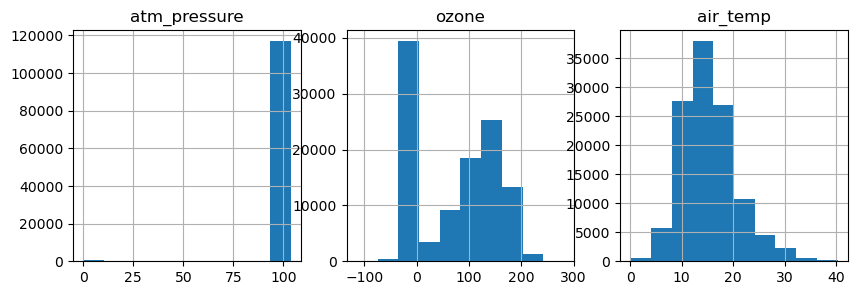

In [28]:

#trying to check the distribution of 
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
cleaned_df['atm_pressure'].hist()
plt.title('atm_pressure')

plt.subplot(1,3,2)
cleaned_df['ozone'].hist()
plt.title('ozone')

plt.subplot(1,3,3)
cleaned_df['air_temp'].hist()
plt.title('air_temp')

In [29]:

for column in cleaned_df:
    if pd.api.types.is_numeric_dtype(cleaned_df[column]):
        cleaned_df[column].fillna(cleaned_df[column].median(), inplace=True)

# Display the DataFrame after filling NA with median
cleaned_df.head()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [30]:
cleaned_df.columns

Index(['time_1', 'lat_long_1', 'rtc', 'battery', 'solarpanel', 'command',
       'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'air_temp', 'averagespl', 'carbonmonoxide',
       'humidity_1', 'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel'],
      dtype='object')

In [31]:
cleaned_df.isna().sum()*100/len(cleaned_df)

time_1                0.000000
lat_long_1            2.237284
rtc                   0.000000
battery               0.000000
solarpanel            0.000000
command               0.000000
solar                 0.000000
precipitation         0.000000
strikes               0.000000
avg_wind_speed        0.000000
avg_wind_direction    0.000000
gust_wind_speed       0.000000
vapourpressure        0.000000
atm_pressure          0.000000
air_temp              0.000000
averagespl            0.000000
carbonmonoxide        0.000000
humidity_1            0.000000
ibatt                 0.000000
nitrogendioxide       0.000000
ozone                 0.000000
particulateserr       0.000000
particulatesvsn       0.000000
peakspl               0.000000
pm1                   0.000000
pm10                  0.000000
pm25                  0.000000
temperature           0.000000
vbatt                 0.000000
vpanel                0.000000
dtype: float64

In [32]:

cleaned_df['lat_long_1'] = cleaned_df['lat_long_1'].fillna(cleaned_df['lat_long_1'].mode())

In [54]:
mode_value = cleaned_df['lat_long_1'].mode()[0]

cleaned_df['lat_long_1'] = cleaned_df['lat_long_1'].fillna(mode_value)

In [49]:
cleaned_df.isna().sum()*100/len(cleaned_df)

time_1                0.0
lat_long_1            0.0
rtc                   0.0
battery               0.0
solarpanel            0.0
command               0.0
solar                 0.0
precipitation         0.0
strikes               0.0
avg_wind_speed        0.0
avg_wind_direction    0.0
gust_wind_speed       0.0
vapourpressure        0.0
atm_pressure          0.0
air_temp              0.0
averagespl            0.0
carbonmonoxide        0.0
humidity_1            0.0
ibatt                 0.0
nitrogendioxide       0.0
ozone                 0.0
particulateserr       0.0
particulatesvsn       0.0
peakspl               0.0
pm1                   0.0
pm10                  0.0
pm25                  0.0
temperature           0.0
vbatt                 0.0
vpanel                0.0
dtype: float64

In [52]:
cleaned_df.tail(50)

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
119604,2024-08-02T20:00:02+00:00,"-37.8022141, 144.9656262",88619011.0,4.136,0.233,0.0,0.0,0.0,0.0,0.71,...,137.0,0.0,151.0,67.0,0.0,2.0,0.0,14.4,3.91,13.53
119605,2024-08-02T21:30:23+00:00,"-37.8022141, 144.9656262",88624433.0,4.134,11.564,0.0,2.0,0.0,0.0,0.60,...,151.0,0.0,151.0,67.0,0.0,3.0,1.0,13.7,3.88,0.00
119606,2024-08-03T06:18:19+00:00,"-37.8022141, 144.9656262",88656109.0,4.197,20.670,0.0,66.0,0.0,0.0,0.74,...,133.0,0.0,151.0,71.0,0.0,2.0,0.0,14.8,3.92,18.30
119607,2024-08-03T07:03:29+00:00,"-37.8022141, 144.9656262",88658812.0,4.194,20.573,0.0,36.0,0.0,0.0,1.11,...,174.0,0.0,151.0,65.0,0.0,0.0,0.0,10.8,3.99,18.30
119608,2024-08-03T07:18:44+00:00,"-37.8022141, 144.9656262",88659734.0,4.189,19.622,0.0,16.0,0.0,0.0,1.16,...,142.0,0.0,151.0,65.0,0.0,0.0,0.0,12.2,4.00,23.23
119609,2024-08-03T07:33:45+00:00,"-37.8022141, 144.9656262",88660635.0,4.190,17.865,0.0,9.0,0.0,0.0,0.93,...,91.0,0.0,151.0,69.0,1.0,2.0,1.0,15.4,3.86,16.41
119610,2024-08-02T15:29:57+00:00,"-37.8022141, 144.9656262",88602807.0,4.150,0.225,0.0,0.0,0.0,0.0,0.49,...,183.0,0.0,151.0,74.0,0.0,1.0,0.0,9.4,3.88,0.00
119611,2024-08-03T13:47:34+00:00,"-37.8022141, 144.9656262",88683063.0,4.165,0.225,0.0,0.0,0.0,0.0,0.66,...,188.0,0.0,151.0,62.0,0.0,0.0,0.0,8.5,3.84,0.00
119612,2024-08-03T08:03:47+00:00,"-37.8022141, 144.9656262",88662437.0,4.190,0.443,0.0,0.0,0.0,0.0,0.73,...,188.0,0.0,151.0,67.0,0.0,0.0,0.0,8.3,3.81,0.00
119613,2024-08-03T08:18:53+00:00,"-37.8022141, 144.9656262",88663342.0,4.186,0.233,0.0,0.0,0.0,0.0,0.53,...,206.0,0.0,151.0,67.0,0.0,1.0,0.0,7.6,3.76,1.77


In [34]:
#

***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```